# Bisecting K-Means Clustering

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from joblib import dump
from matplotlib.markers import MarkerStyle
from sklearn.cluster import BisectingKMeans
from sklearn.metrics import (
    calinski_harabasz_score,
    davies_bouldin_score,
    silhouette_samples,
    silhouette_score,
)

In [2]:
df = pd.read_csv("../../../Datasets/ClusterPoints.csv")
df.head()

,X,Y
0,33,43
1,48,10
2,15,32
3,41,16
4,47,11


In [3]:
silhouette = []
wcss = []
calinski_harabasz = []
davies_bouldin = []
silhouette_s = []
for k in range(2, 11):
    bkmeans = BisectingKMeans(n_clusters=k)
    cluster_labels = bkmeans.fit_predict(df)
    wcss.append(bkmeans.inertia_)
    silhouette.append(silhouette_score(df, cluster_labels))
    calinski_harabasz.append(calinski_harabasz_score(df, cluster_labels))
    davies_bouldin.append(davies_bouldin_score(df, cluster_labels))
    silhouette_s.append(silhouette_samples(df, cluster_labels))

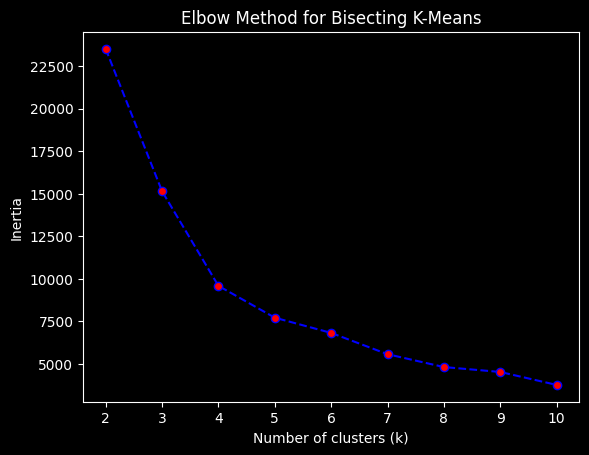

In [4]:
plt.plot(
    range(2, 11),
    wcss,
    linestyle="dashed",
    color="blue",
    marker="o",
    markerfacecolor="red",
)
plt.xticks(np.arange(2, 11))
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Bisecting K-Means")
plt.show()

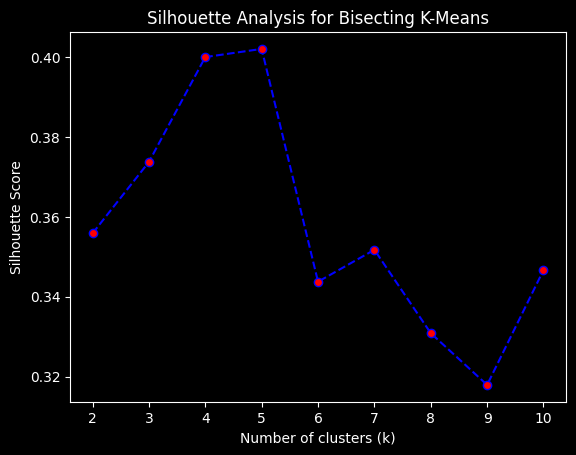

In [5]:
plt.plot(
    range(2, 11),
    silhouette,
    linestyle="dashed",
    color="blue",
    marker="o",
    markerfacecolor="red",
)
plt.xticks(np.arange(2, 11))
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis for Bisecting K-Means")
plt.show()

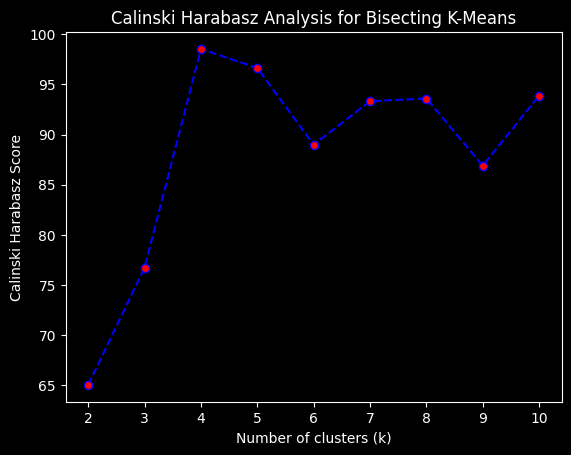

In [6]:
plt.plot(
    range(2, 11),
    calinski_harabasz,
    linestyle="dashed",
    color="blue",
    marker="o",
    markerfacecolor="red",
)
plt.xticks(np.arange(2, 11))
plt.xlabel("Number of clusters (k)")
plt.ylabel("Calinski Harabasz Score")
plt.title("Calinski Harabasz Analysis for Bisecting K-Means")
plt.show()

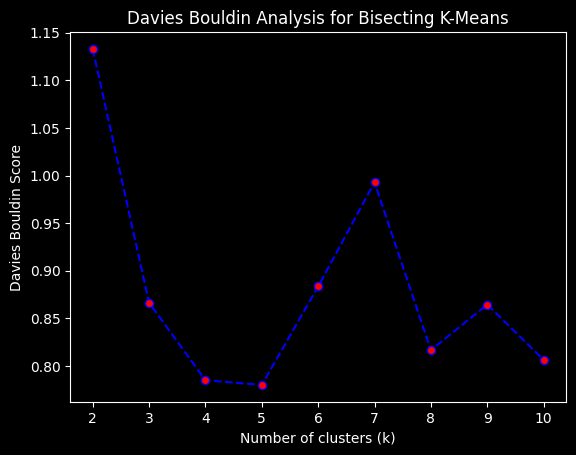

In [7]:
plt.plot(
    range(2, 11),
    davies_bouldin,
    linestyle="dashed",
    color="blue",
    marker="o",
    markerfacecolor="red",
)
plt.xticks(np.arange(2, 11))
plt.xlabel("Number of clusters (k)")
plt.ylabel("Davies Bouldin Score")
plt.title("Davies Bouldin Analysis for Bisecting K-Means")
plt.show()

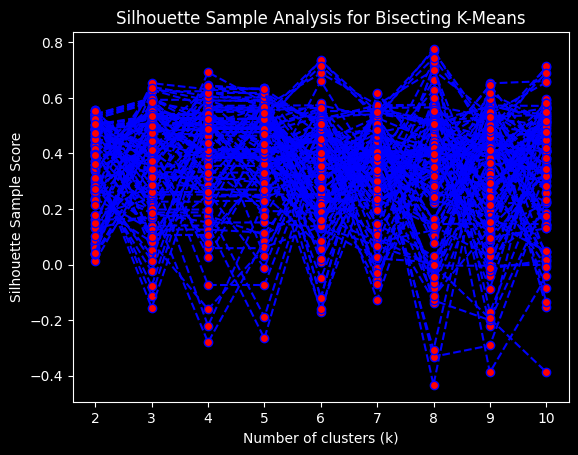

In [8]:
plt.plot(
    range(2, 11),
    silhouette_s,
    linestyle="dashed",
    color="blue",
    marker="o",
    markerfacecolor="red",
)
plt.xticks(np.arange(2, 11))
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Sample Score")
plt.title("Silhouette Sample Analysis for Bisecting K-Means")
plt.show()

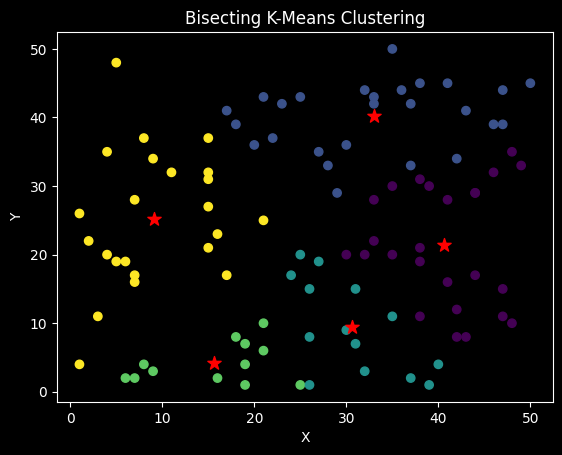

In [9]:
bkmeans = BisectingKMeans(n_clusters=5)
cluster_labels = bkmeans.fit_predict(df)
centroids = bkmeans.cluster_centers_
plt.scatter(df["X"], df["Y"], c=cluster_labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker=MarkerStyle("*"), c="red", s=100)
plt.title("Bisecting K-Means Clustering")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [10]:
print("WCSS (Inertia) :", bkmeans.inertia_)
print("Silhouette Score :", silhouette_score(df, cluster_labels))
print("Calinski Harabasz Score :", calinski_harabasz_score(df, cluster_labels))
print("Davies Bouldin Score :", davies_bouldin_score(df, cluster_labels))
print("Silhouette Samples :", silhouette_samples(df, cluster_labels))

WCSS (Inertia) : 9817.583213887563
Silhouette Score : 0.29104157792035534
Calinski Harabasz Score : 70.89193781272505
Davies Bouldin Score : 0.9518472283985469
Silhouette Samples : [ 0.569389    0.16025104  0.37263481  0.26732328  0.18724103  0.5026732
  0.26462824  0.54998795  0.40693224 -0.38942913  0.35951813  0.16032608
  0.50487478  0.5762152   0.14088573  0.51469875  0.55939072  0.47452685
  0.21030088  0.51202976  0.33499455  0.47130851  0.15722927  0.50835182
 -0.13501707  0.23447993  0.36144424  0.40003484  0.41375456  0.40505205
  0.0696792   0.09481388  0.57769     0.08828195  0.32414168  0.48082589
  0.06422084  0.41702847 -0.12568181  0.056822    0.42704766  0.53365409
  0.54291226 -0.21351393  0.37267649  0.17411659 -0.09271717  0.27407093
  0.20191639  0.37672815  0.13569507  0.09933328  0.36520835  0.49588947
 -0.08602724  0.323089    0.37661028  0.48328788  0.18510383  0.00539808
  0.25240506  0.60532461 -0.06528458  0.20040965  0.57486848  0.29853201
  0.18423559  0.3

In [11]:
dump(bkmeans, "../../../Models/bisectingKMeansClustering.joblib")

['../../../Models/bisectingKMeansClustering.joblib']